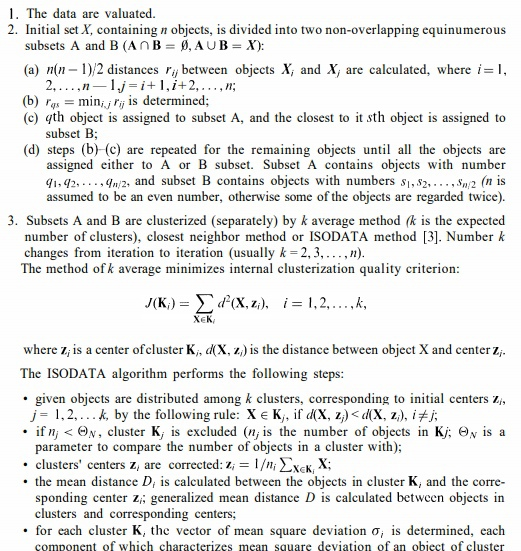
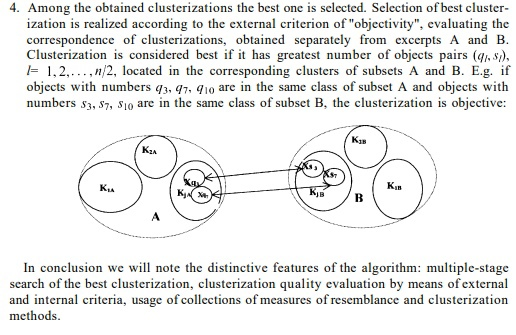

In [1]:
from OCC_class import OCC

In [2]:
import pandas as pd
import numpy as np
from copy import copy
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt


In [3]:
dataset = pd.read_excel("G:/Baikal_data/Dataset.xls")
for i in range(len(dataset['date'])):
    dataset['date'] = dataset['date'].apply(lambda x: x[:5])
    dataset['time'] = dataset['time'].apply(lambda x: x[:5])
dataset = dataset.drop(["Unnamed: 0", 'Ri'], axis=1)
dataset = dataset.rename(columns={"структ. пост. для оптического показат. преломл.(Cn2), 1/(см^2/3)":"Cn2"})
dataset = dataset.dropna()
dataset['Cn2'] = dataset['Cn2'] * 10**16
dataset['date_time'] = dataset['date'] + ' ' + dataset['time']
dataset = dataset.drop(['time'], axis=1)
dataset = dataset.reset_index()
dataset = dataset.drop(['index'], axis=1)

In [4]:
dataset = dataset.drop(['date', 'date_time'], axis=1)

In [5]:
from importlib import reload
import OCC_class

In [8]:
len(dataset)

7160

In [54]:
OCC_class = reload(OCC_class)
clusterizator = OCC_class.OCC(10)
clusterized_dataset = clusterizator.fit(dataset)

Расчет расстояния между примерами...

[[0.00000000e+00 1.00000000e+00 7.50941592e+00]
 [0.00000000e+00 2.00000000e+00 1.12937635e+02]
 [0.00000000e+00 3.00000000e+00 1.08268622e+02]
 ...
 [7.15700000e+03 7.15800000e+03 1.45520127e+01]
 [7.15700000e+03 7.15900000e+03 2.51463328e+01]
 [7.15800000e+03 7.15900000e+03 3.16908884e+01]]
Разделение на массивы А и В...

25622061
25614903
25607746
25600590
25593435
25586281
25579128
25571976
25564825
25557675
25550526
25543378
25536231
25529085
25521940
25514796
25507653
25500511
25493370
25486230
25479091
25471953
25464816
25457680
25450545
25443411
25436278
25429146
25422015
25414885
25407756
25400628
25393501
25386375
25379250
25372126
25365003
25357881
25350760
25343640
25336521
25329403
25322286
25315170
25308055
25300941
25293828
25286716
25279605
25272495
25265386
25258278
25251171
25244065
25236960
25229856
25222753
25215651
25208550
25201450
25194351
25187253
25180156
25173060
25165965
25158871
25151778
25144686
25137595
25130505
251234

KeyboardInterrupt: 

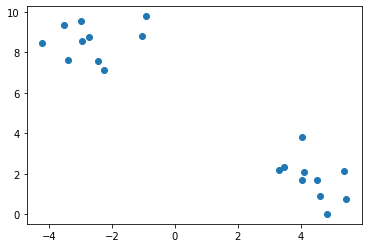

In [28]:
from sklearn.datasets import make_blobs
blobs = np.array(make_blobs(n_samples=20,
                            n_features=2,
                            centers=2,
                            cluster_std=1.0,
                            shuffle=True,
                            random_state=42)[0])
plt.scatter(blobs[:, 0], blobs[:, 1])

In [29]:
OCC_class = reload(OCC_class)
clusterizator = OCC_class.OCC(10)
clusterized_dataset = clusterizator.fit(blobs)

Расчет расстояния между примерами...

[[ 0.          1.          3.56166262]
 [ 0.          2.          2.06099196]
 [ 0.          3.          9.77317591]
 [ 0.          4.          2.38600797]
 [ 0.          5.         11.3495302 ]
 [ 0.          6.          7.75627309]
 [ 0.          7.          2.63136288]
 [ 0.          8.          9.19287465]
 [ 0.          9.          2.07157978]
 [ 0.         10.          9.90563439]
 [ 0.         11.          8.64717981]
 [ 0.         12.          0.99968242]
 [ 0.         13.          2.66286618]
 [ 0.         14.          3.30720531]
 [ 0.         15.          2.99574228]
 [ 0.         16.         10.46345122]
 [ 0.         17.          8.71376225]
 [ 0.         18.          9.50300818]
 [ 0.         19.         11.06313057]
 [ 1.          2.          1.67237149]
 [ 1.          3.         11.07592484]
 [ 1.          4.          1.26519011]
 [ 1.          5.         12.39784552]
 [ 1.          6.          9.47817045]
 [ 1.          7.         

UnboundLocalError: local variable 'A_index' referenced before assignment

In [107]:
from itertools import combinations
indexes = np.array(combinations(range(6), 2))

In [108]:
print(indexes)

In [109]:
print(np.array(indexes)[:, 0])

IndexError: too many indices for array: array is 0-dimensional, but 2 were indexed

In [39]:
pair = np.array([0, 1])
a = np.array([
    [0, 0],
    [0, 1],
    [0, 2],
    [0, 3],
    [1, 2],
    [1, 3],
    [2, 3]
])

In [48]:
new = a[a[:, 0] != (pair[0] and pair[1])] | a[a[:, 1] != (pair[0] and pair[1])]
new

ValueError: operands could not be broadcast together with shapes (3,2) (6,2) 

In [ ]:
pd.concat([predicted_A, predicted_B]).head(3600)

,0
0,0
1,0
2,0
3,0
4,0
...,...
15,0
16,0
17,0
18,0


In [ ]:
pd.concat([predicted_A, predicted_B])

,0,1,2,3,4,5,6,7,pred
0,6.720,3.118,331.2,-2.649,-1.459,0.523,700.5,100.0,2
1,3.078,5.971,343.7,-5.674,-1.664,1.009,707.2,100.0,2
2,6.720,3.092,336.2,-2.750,-1.212,0.615,700.5,100.0,2
3,6.743,3.125,335.2,-2.812,-1.300,0.515,700.5,100.0,2
4,6.715,3.332,340.0,-3.068,-1.119,0.571,700.5,100.0,2
...,...,...,...,...,...,...,...,...,...
3575,19.248,0.341,16.1,-0.294,0.085,-0.049,688.7,57.9,4
3576,16.838,0.769,119.9,0.374,0.649,-0.107,693.2,61.6,8
3577,19.571,0.240,217.3,0.108,-0.082,-0.048,692.1,53.7,7
3578,23.225,0.865,307.5,-0.291,-0.380,0.139,690.1,30.8,6
